In [1]:
import numpy as np
import pandas as pd
import os
from glob import glob
from pprint import pprint
import json
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.pyplot as plt

import cellcycle.PlottingTools as plottingTools
from cellcycle.ParameterSet import ParameterSet
import cellcycle.DataStorage as dataStorage
import cellcycle.DataAnalysis as dataAnalysis
import cellcycle.MakeDataframe as makeDataframe

In [12]:
model = 'LDDR' # options 'LDDR' or 'LDDR_titration'
file_path = '/home/berger/Documents/Arbeit/PhD/data/UltrasensitivityCombined/NatCom/fig_5/time_traces/'+model
parameter_path = os.path.join(file_path, 'parameter_set.csv')
indx = 0


# Make data frame from time traces

In [13]:
data_frame = makeDataframe.make_dataframe(file_path)
data_frame = data_frame.sort_values(by=['rate_growth'])

time_traces_data_frame = pd.read_hdf(data_frame['path_dataset'].iloc[indx], key='dataset_time_traces')

v_init_data_frame = pd.read_hdf(data_frame['path_dataset'].iloc[indx], key='dataset_init_events')
v_init = v_init_data_frame.iloc[-1]['v_init_per_ori']
v_init_per_ori = v_init_data_frame.iloc[-1]['v_init_per_ori']
t_init_list = v_init_data_frame['t_init'].to_numpy()

v_d_data_frame = pd.read_hdf(data_frame['path_dataset'].iloc[indx], key='dataset_div_events')
data_frame

['/home/berger/Documents/Arbeit/PhD/data/UltrasensitivityCombined/NatCom/fig_5/time_traces/LDDR/S11_titration_switch_combined_0.pdf',
 '/home/berger/Documents/Arbeit/PhD/data/UltrasensitivityCombined/NatCom/fig_5/time_traces/LDDR/S11_titration_switch_combined_1.pdf',
 '/home/berger/Documents/Arbeit/PhD/data/UltrasensitivityCombined/NatCom/fig_5/time_traces/LDDR/S11_LDDR_2.pdf',
 '/home/berger/Documents/Arbeit/PhD/data/UltrasensitivityCombined/NatCom/fig_5/time_traces/LDDR/S11_titration_switch_combined_2.pdf',
 '/home/berger/Documents/Arbeit/PhD/data/UltrasensitivityCombined/NatCom/fig_5/time_traces/LDDR/S11_LDDR_1.pdf',
 '/home/berger/Documents/Arbeit/PhD/data/UltrasensitivityCombined/NatCom/fig_5/time_traces/LDDR/S11_LDDR_0.pdf',
 '/home/berger/Documents/Arbeit/PhD/data/UltrasensitivityCombined/NatCom/fig_5/time_traces/LDDR/LDDR_rida_500_time_traces']


,simu_name,simu_path,sub_simu_name,sub_simu_path,path_parameter_file,path_dataset,n_series,id,root_path,file_name,...,period_oscillations,offset_oscillations,continuous_oscillations,underexpression_oscillations,independent_division_cycle,version_of_independent_division_regulation,version_of_coupled_division_regulation,division_volume,v_init_th,cv_added_volume
0,LDDR_rida_500_time_traces,/home/berger/Documents/Arbeit/PhD/data/Ultrase...,vary_growth_rate_0,/home/berger/Documents/Arbeit/PhD/data/Ultrase...,/home/berger/Documents/Arbeit/PhD/data/Ultrase...,/home/berger/Documents/Arbeit/PhD/data/Ultrase...,3,0,/home/berger/Documents/Arbeit/PhD/data/Ultrase...,vary_growth_rate,...,4.000000,350.0,1,0,0.0,IDA,cooper,0.4,0.28,0.1
2,LDDR_rida_500_time_traces,/home/berger/Documents/Arbeit/PhD/data/Ultrase...,vary_growth_rate_1,/home/berger/Documents/Arbeit/PhD/data/Ultrase...,/home/berger/Documents/Arbeit/PhD/data/Ultrase...,/home/berger/Documents/Arbeit/PhD/data/Ultrase...,3,1,/home/berger/Documents/Arbeit/PhD/data/Ultrase...,vary_growth_rate,...,1.166667,350.0,1,0,0.0,IDA,cooper,0.4,0.28,0.1
1,LDDR_rida_500_time_traces,/home/berger/Documents/Arbeit/PhD/data/Ultrase...,vary_growth_rate_2,/home/berger/Documents/Arbeit/PhD/data/Ultrase...,/home/berger/Documents/Arbeit/PhD/data/Ultrase...,/home/berger/Documents/Arbeit/PhD/data/Ultrase...,3,2,/home/berger/Documents/Arbeit/PhD/data/Ultrase...,vary_growth_rate,...,0.833333,350.0,1,0,0.0,IDA,cooper,0.4,0.28,0.1


In [14]:
time = np.array(time_traces_data_frame["time"])
volume = np.array(time_traces_data_frame["volume"])
n_ori = np.array(time_traces_data_frame["n_ori"])
active_fraction = np.array(time_traces_data_frame["active_fraction"])
free_conc = np.array(time_traces_data_frame["free_conc"])
print(time.size)
cycle_0 = 8
cycle_f = 11
t_0 = time[volume==v_d_data_frame['v_b'][cycle_0]]
indx_0 = np.where(time==t_0)[0][0]
t_f = time[volume==v_d_data_frame['v_b'][cycle_f]]
indx_f = np.where(time==t_f)[0][0]+10

print(indx_0, indx_f)

n_ori_cut = n_ori[indx_0:indx_f]
time_cut = time[indx_0:indx_f]
volume_cut = volume[indx_0:indx_f]
active_fraction_cut = active_fraction[indx_0:indx_f]
free_conc_cut = free_conc[indx_0:indx_f]

t_init_list_cut_1 = t_init_list[t_init_list>t_0]
t_init_list_cut = t_init_list_cut_1[t_init_list_cut_1<t_f]
t_b = t_init_list + data_frame.iloc[indx]['t_CD']
t_b_cut_1 = t_b[t_b<t_f]
t_b_cut = t_b_cut_1[t_b_cut_1>t_0]
print(t_init_list_cut, t_b_cut)

100000
20420 26431
[21.418 23.419 25.419] [22.418 24.419 26.419]


# Color definitions

In [15]:
pinkish_red = (247 / 255, 109 / 255, 109 / 255)
green = (0 / 255, 133 / 255, 86 / 255)
dark_blue = (36 / 255, 49 / 255, 94 / 255)
light_blue = (168 / 255, 209 / 255, 231 / 255)
darker_light_blue = (112 / 255, 157 / 255, 182 / 255)
blue = (55 / 255, 71 / 255, 133 / 255)
yellow = (247 / 255, 233 / 255, 160 / 255)

# Plot three figures

0.5
number of titration sites per origin: 0.0


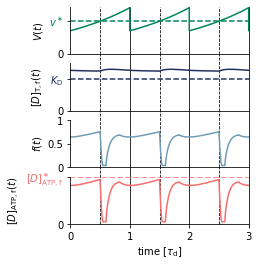

In [16]:
label_list = [r'$V(t)$', r'$[D]_{\rm T, f}(t)$', r'$f(t)$', r'$[D]_{\rm ATP, f}(t)$']
x_axes_list = [time_cut, time_cut, time_cut, time_cut]
y_axes_list = [volume_cut, free_conc_cut, active_fraction_cut, free_conc_cut * active_fraction_cut]
color_list = [green, dark_blue, darker_light_blue, pinkish_red]
fig, ax = plt.subplots(4, figsize=(3.2,4))
plt.xlabel(r'time [$\tau_{\rm d}$]')
y_min_list = [0,0,0,0]
y_max_list = [1, 1.2, 1.2, 1.2]

doubling_time = 1/data_frame.iloc[indx]['doubling_rate']
print(1/doubling_time)
print('number of titration sites per origin:', data_frame.iloc[indx]['n_c_max_0'])
for item in range(0, len(label_list)):
    ax[item].set_ylabel(label_list[item])
    ax[item].plot(x_axes_list[item], y_axes_list[item], color=color_list[item])
    ax[item].set_ylim(ymin=0)
    ax[item].tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=False) # labels along the bottom edge are off
    ax[item].spines["top"].set_visible(False)
    ax[item].spines["right"].set_visible(False)
    ax[item].margins(0)
    for t_div in t_b_cut:
        ax[item].axvline(x=t_div, 
                          ymin=y_min_list[item],
                          ymax=y_max_list[item],
                             c="black",
                          zorder=0, 
                          linewidth=0.8,
                          clip_on=False)
    for t_init in t_init_list_cut:
        ax[item].axvline(x=t_init, 
                          ymin=y_min_list[item],
                          ymax=y_max_list[item],
                             c="black",
                          zorder=0, 
                          linewidth=0.8,
                          linestyle='--',
                          clip_on=False)

if indx==0:
    ax[0].set_yticks([0, v_init])
    ax[0].set_yticklabels(['0',r'$v^\ast$'])
    ax[0].get_yticklabels()[1].set_color(green)
    ax[0].axhline(y=v_init, color=green, linestyle='--')
    
if indx==1:
    ax[0].set_yticks([0, v_init, 2*v_init])
    ax[0].set_yticklabels(['0',r'$v^\ast$',r'$2 \, v^\ast$'])
    ax[0].get_yticklabels()[1].set_color(green)
    ax[0].get_yticklabels()[2].set_color(green)
    ax[0].axhline(y=v_init, color=green, linestyle='--')
    ax[0].axhline(y=2 * v_init, color=green, linestyle='--')
    
if indx==2:
    ax[0].set_yticks([0, 2 * v_init, 4*v_init])
    ax[0].set_yticklabels(['0',r'$2 \, v^\ast$',r'$4 \, v^\ast$'])
    ax[0].get_yticklabels()[1].set_color(green)
    ax[0].get_yticklabels()[2].set_color(green)
    ax[0].axhline(y=2 * v_init, color=green, linestyle='--')
    ax[0].axhline(y=4 * v_init, color=green, linestyle='--')
    
# ax[0].set_yticks([0, v_init_per_ori, 2*v_init_per_ori, 4*v_init_per_ori])
# # ax[0].set(ylim=(0, v_init+0.01))
# ax[0].set_yticklabels(['0',r'$v^\ast$',r'$2 \,v^\ast$',r'$4 \, v^\ast$'])
# ax[0].get_yticklabels()[1].set_color(green)
# ax[0].get_yticklabels()[2].set_color(green)
# ax[0].get_yticklabels()[3].set_color(green)
# ax[0].axhline(y=v_init, color=green, linestyle='--')

ax[1].axhline(y=data_frame.iloc[0]['michaelis_const_initiator'], color=color_list[1], linestyle='--')
ax[1].set_yticks([0, data_frame.iloc[0]['michaelis_const_initiator']])
ax[1].set_yticklabels([0, r'$K_{\rm D}$'])
ax[1].get_yticklabels()[1].set_color(color_list[1])
ax[1].set(ylim=(0,data_frame.iloc[0]['michaelis_const_initiator']*1.5))


# ax[2].axhline(y=data_frame.iloc[0]['frac_init'], color=pinkish_red, linestyle='--')
ax[2].set_yticks([0, 0.5, 1])
ax[2].set_yticklabels(['0', '0.5', '1'])

ax[3].set_yticks([0, data_frame.iloc[0]['critical_free_active_conc']])
ax[3].set_yticklabels(['0',r'$[D]_{\rm ATP, f}^\ast$'])
ax[3].get_yticklabels()[1].set_color(color_list[3])
if model == 'LDDR':
    ax[3].axhline(y=data_frame.iloc[0]['init_conc'], color=color_list[3], linestyle='--')
else:
    ax[3].axhline(y=data_frame.iloc[0]['critical_free_active_conc'], color=color_list[3], linestyle='--')
ax[3].tick_params(bottom=True, labelbottom=True)
ax[3].tick_params(axis='x', colors='black')
ax[3].set_xticks([time_cut[0], 
                  time_cut[0]+ doubling_time, 
                  time_cut[0]+ 2*doubling_time,
                  time_cut[0]+ 3*doubling_time
                 ])
ax[3].set_xticklabels(['0', '1', '2', '3'])
plt.savefig(file_path + '/S11_'+model+'_'+str(indx)+'.pdf', format='pdf',bbox_inches='tight')